In [31]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = os.getcwd()
file_path = os.path.join(path)
main_df = pd.read_csv(os.path.join(file_path,"marketing_campaign.csv"), sep='\t')

main_df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [32]:
#데이터 전처리
gold_df = main_df[['Income','MntGoldProds']]

gold_df

,Income,MntGoldProds
0,58138.0,88
1,46344.0,6
2,71613.0,42
3,26646.0,5
4,58293.0,15
...,...,...
2235,61223.0,247
2236,64014.0,8
2237,56981.0,24
2238,69245.0,61


<AxesSubplot:xlabel='Income', ylabel='MntGoldProds'>

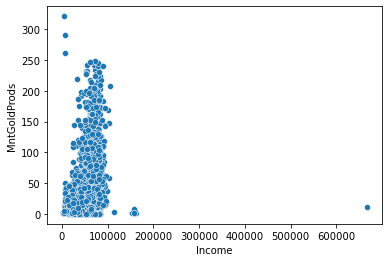

In [33]:
sns.scatterplot(x='Income', y = 'MntGoldProds', data = gold_df)

In [34]:
#전체적인 추이를 보기 위함이므로 INCOME 600M의 데이터 값은 날려버렸다

new_gold_df = gold_df[gold_df['Income'] < 600000]

new_gold_df

,Income,MntGoldProds
0,58138.0,88
1,46344.0,6
2,71613.0,42
3,26646.0,5
4,58293.0,15
...,...,...
2235,61223.0,247
2236,64014.0,8
2237,56981.0,24
2238,69245.0,61


<AxesSubplot:xlabel='Income', ylabel='MntGoldProds'>

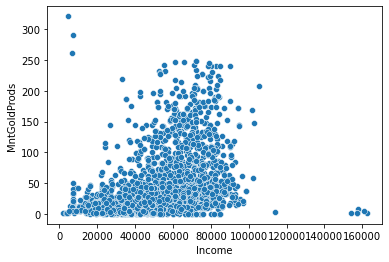

In [35]:
sns.scatterplot(x='Income', y = 'MntGoldProds', data = new_gold_df)

In [36]:
#데이터 보기가 불편해서 일정 구간별로 나눠보기
r = [i for i in range(0,180001, 20000)]
new_gold_df['Income'] = pd.cut(new_gold_df['Income'], r, labels = r[:-1])

new_gold_df

<ipython-input-36-e35602e2560c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_gold_df['Income'] = pd.cut(new_gold_df['Income'], r, labels = r[:-1])


,Income,MntGoldProds
0,40000,88
1,40000,6
2,60000,42
3,20000,5
4,40000,15
...,...,...
2235,60000,247
2236,60000,8
2237,40000,24
2238,60000,61


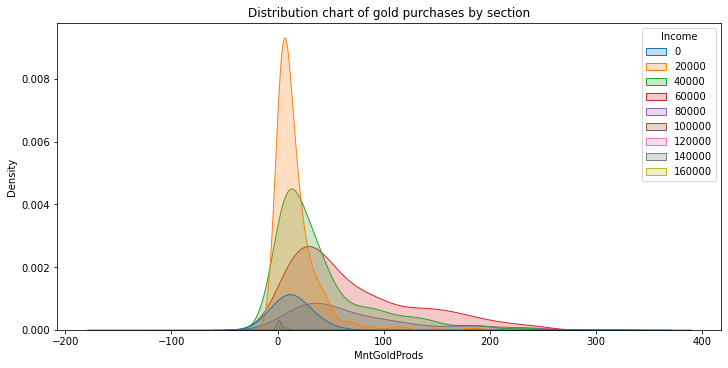

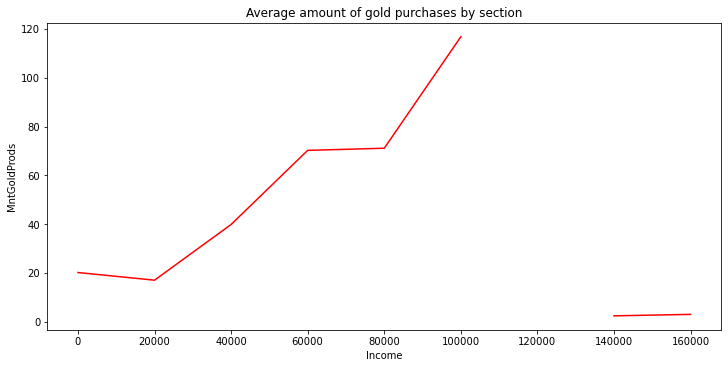

In [49]:
fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)

sns.kdeplot(x='MntGoldProds', data=new_gold_df, hue='Income',fill=True, ax=ax)
plt.title('Distribution chart of gold purchases by section')

plt.show()
mean_df = new_gold_df.groupby('Income').mean()

fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
sns.lineplot(x = 'Income', y= 'MntGoldProds', data = mean_df, color='red')
plt.title('Average amount of gold purchases by section')
plt.show()